# Lec 13. CNN with CIFAR10

In [1]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as Data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils

import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.ones((1, 2, 3))
print(x)
print(x.shape)
print('')

xx = np.transpose(x, axes=(1, 0, 2))
print(xx.shape)

[[[1. 1. 1.]
  [1. 1. 1.]]]
(1, 2, 3)

(2, 1, 3)


## Load Data

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
batch_size = 100

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalization...!!!

cifar10_train = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_test  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = Data.DataLoader(cifar10_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = Data.DataLoader(cifar10_test, batch_size=5, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
cifar10_train.train_data.shape, cifar10_test.test_data.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Explore data

In [7]:
data_iter = iter(train_loader)
images, labels = data_iter.next()   # batch_size 만큼 리턴

images.size()

torch.Size([100, 3, 32, 32])

In [8]:
images[0]  # RGB channels. [3, 32, 32]

tensor([[[ 1.0000,  0.9843,  0.9529,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  0.9922,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
         [ 1.0000,  0.9216,  0.5686,  ...,  0.9922,  0.9922,  0.9922],
         ...,
         [ 0.8588,  0.7255,  0.7882,  ...,  0.9922,  0.9922,  0.9922],
         [ 1.0000,  0.9294,  0.7490,  ...,  0.9922,  0.9922,  0.9922],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

        [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  0.9922,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
         [ 1.0000,  0.8588,  0.4353,  ...,  0.9922,  0.9922,  0.9922],
         ...,
         [ 0.8510,  0.6235,  0.5373,  ...,  0.9922,  0.9922,  0.9922],
         [ 1.0000,  0.8824,  0.5216,  ...,  0.9922,  0.9922,  0.9922],
         [ 1.0000,  1.0000,  0.9451,  ...,  1.0000,  1.0000,  1.0000]],

        [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  0.9922,  ...,  0

In [9]:
image_0 = torchvision.utils.make_grid(images[0], normalize=True)
print(image_0)
print(image_0.shape)

tensor([[[1.0000, 0.9915, 0.9745,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9957, 0.9915,  ..., 0.9957, 0.9957, 0.9957],
         [1.0000, 0.9574, 0.7660,  ..., 0.9957, 0.9957, 0.9957],
         ...,
         [0.9234, 0.8511, 0.8851,  ..., 0.9957, 0.9957, 0.9957],
         [1.0000, 0.9617, 0.8638,  ..., 0.9957, 0.9957, 0.9957],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9957, 0.9915,  ..., 0.9957, 0.9957, 0.9957],
         [1.0000, 0.9234, 0.6936,  ..., 0.9957, 0.9957, 0.9957],
         ...,
         [0.9191, 0.7957, 0.7489,  ..., 0.9957, 0.9957, 0.9957],
         [1.0000, 0.9362, 0.7404,  ..., 0.9957, 0.9957, 0.9957],
         [1.0000, 1.0000, 0.9702,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 0.9957,  ..., 0.9957, 0.9957, 0.9957],
         [1.0000, 0.9319, 0.6681,  ..., 0.9957, 0.9957, 0.

In [10]:
print(image_0.numpy().shape)
print(np.transpose(image_0.numpy(),(1,2,0)).shape)

(3, 32, 32)
(32, 32, 3)


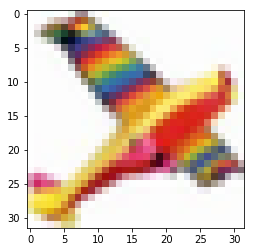

In [11]:
plt.imshow(np.transpose(image_0.numpy(),(1,2,0)))

In [12]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (10, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

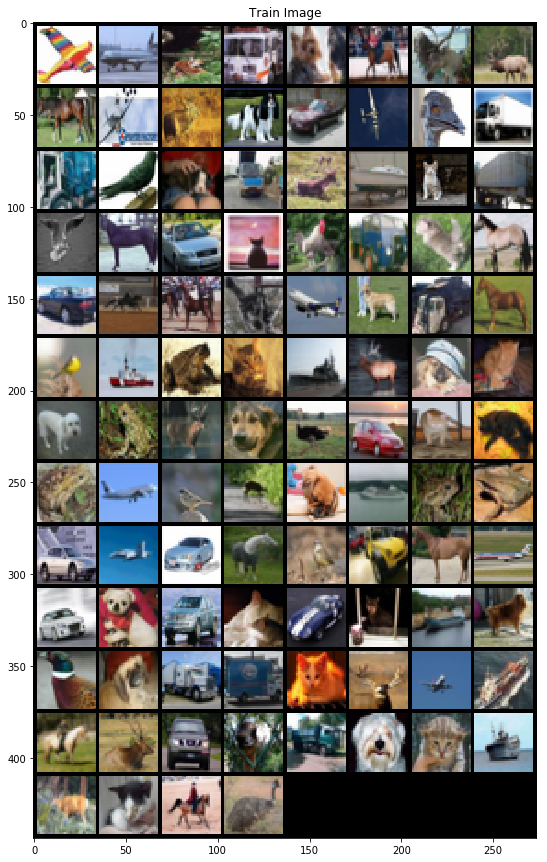

In [13]:
imshow(torchvision.utils.make_grid(images, normalize=True), "Train Image")

## 13.2 Define Model

In [14]:
def c_conv(N, K, P=0, S=1):
    return int((N + 2*P - K) / S + 1)

def c_pool(N, K):
    return int(N/K)

In [15]:
c0 = 32
c1 = c_conv(c0, 3)
c2 = c_conv(c1, 3)
c3 = c_pool(c2, 2)

c4 = c_conv(c3, 3)
c5 = c_conv(c4, 3)
c6 = c_pool(c5, 2)

print(c1, c2, c3, c4, c5, c6)

30 28 14 12 10 5


In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer = nn.Sequential(
            nn.Conv2d(3, 32, 3),  # 32 --> 28
            nn.BatchNorm2d(32),
            nn.ReLU(),            

            nn.Conv2d(32, 64, 3),
            nn.BatchNorm2d(64),
            nn.ReLU(),            
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(64, 128, 3),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Conv2d(128, 256, 3),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2,2)     # 5
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(256 * 5 * 5, 100),
            nn.ReLU(),
            nn.Linear(100, 10)              
        )

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)
            elif isinstance(m, nn.Linear):
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)
                
    def forward(self, x):
        out = self.layer(x)
        out = out.view(-1, 256*5*5)  # fc_layer와 맞춰줄것.
        out = self.fc_layer(out)
        
        return out
    
model = CNN().cuda()

In [17]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
num_epochs = 20

total_batch = len(cifar10_train)//batch_size
total_batch

500

In [19]:
for epoch in range(num_epochs):

    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.cuda()
        Y = batch_labels.cuda()

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) == total_batch:
            print('Epoch [%d/%d], lter [%d/%d] Loss: %.4f'%(epoch+1, num_epochs, i+1, total_batch, cost.item()))

Epoch [1/20], lter [500/500] Loss: 0.9306
Epoch [2/20], lter [500/500] Loss: 0.8487
Epoch [3/20], lter [500/500] Loss: 0.8473
Epoch [4/20], lter [500/500] Loss: 0.6374
Epoch [5/20], lter [500/500] Loss: 0.2850
Epoch [6/20], lter [500/500] Loss: 0.3335
Epoch [7/20], lter [500/500] Loss: 0.4614
Epoch [8/20], lter [500/500] Loss: 0.1608
Epoch [9/20], lter [500/500] Loss: 0.1413
Epoch [10/20], lter [500/500] Loss: 0.0779
Epoch [11/20], lter [500/500] Loss: 0.1317
Epoch [12/20], lter [500/500] Loss: 0.1532
Epoch [13/20], lter [500/500] Loss: 0.1641
Epoch [14/20], lter [500/500] Loss: 0.1065
Epoch [15/20], lter [500/500] Loss: 0.1113
Epoch [16/20], lter [500/500] Loss: 0.0345
Epoch [17/20], lter [500/500] Loss: 0.0764
Epoch [18/20], lter [500/500] Loss: 0.0537
Epoch [19/20], lter [500/500] Loss: 0.1118
Epoch [20/20], lter [500/500] Loss: 0.0315


## 13.3 Test Model

In [20]:
model.eval()

correct = 0
total = 0

for images, labels in test_loader:
    
    images = images.cuda()
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()
    

correct = correct.cpu().numpy()    
print('correct :', correct)
print('total   :', total)
print('Accuracy of test images: %f' % (100 * correct / total))

correct : 7777
total   : 10000
Accuracy of test images: 77.770000


In [21]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images.cuda())
        _, predicted = torch.max(outputs, 1)
        
        c = (predicted == labels.cuda()).squeeze()
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 83 %
Accuracy of   car : 91 %
Accuracy of  bird : 46 %
Accuracy of   cat : 67 %
Accuracy of  deer : 82 %
Accuracy of   dog : 67 %
Accuracy of  frog : 75 %
Accuracy of horse : 82 %
Accuracy of  ship : 85 %
Accuracy of truck : 89 %


Predicted:    cat  ship  ship plane  frog


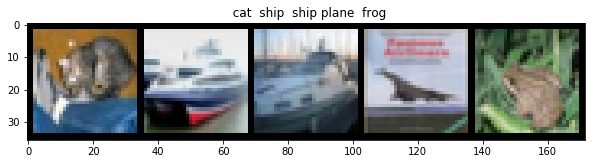

In [22]:
images, labels = iter(test_loader).next()

outputs = model(images.cuda())

_, predicted = torch.max(outputs.data, 1)
    
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(5)))

title = (' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images, normalize=True), title)

In [23]:
def imshow_one(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (2, 2))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

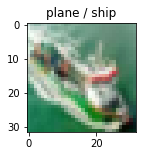

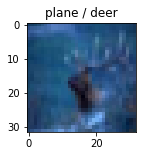

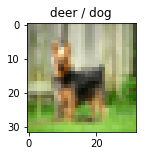

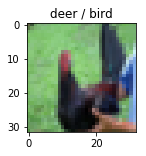

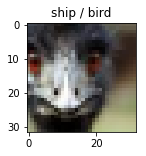

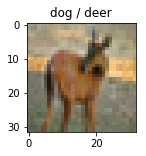

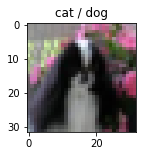

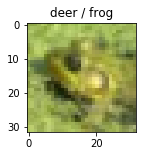

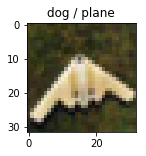

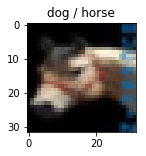

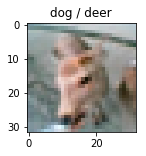

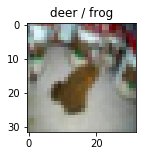

In [24]:
# 테스트 중 틀린 것만 보고 싶은 경우

for i, (images, labels) in enumerate(test_loader) :
    
    outputs = model(images.cuda())

    _, predicted = torch.max(outputs.data, 1)

    for k in range(5):
        if predicted[k].cpu() != labels[k]:
            imshow_one(torchvision.utils.make_grid(images[k], normalize=True), classes[predicted[k]] + " / " + classes[labels[k]])
        
    if i > 10 :
        break